# Visualizing the hydrogen electron orbitals

In [17]:
#Load libraries

%matplotlib inline
#%matplotlib notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

from sympy.physics.hydrogen import E_nl, R_nl
from sympy.plotting import plot, plot3d
from sympy import *

import scipy.special as ss
import numpy as np
import math

In [18]:
#Define variables and symbols
#x,y,z -- Cartesian coordinates relative to x0,y0,z0 point
#R -- distance from x0,y0,z0 point
#n -- the principal quantum number
#l -- the angular quantum number 
#m -- magnetic quantum number
#Z -- nucleus charge
var("xr yr zr R x0 y0 z0")
n, l, m, Z = symbols("n l m Z")
x = xr-x0
y = yr-y0
z = zr-z0
r = sqrt((x**2 + y**2 + z**2))

The radial function is implemented in sympy.

In [19]:
R_nl(n, l, r, Z)

2*(2*Z*sqrt((-x0 + xr)**2 + (-y0 + yr)**2 + (-z0 + zr)**2)/n)**l*sqrt(Z**3*factorial(-l + n - 1)/(n**4*factorial(l + n)))*exp(-Z*sqrt((-x0 + xr)**2 + (-y0 + yr)**2 + (-z0 + zr)**2)/n)*assoc_laguerre(-l + n - 1, 2*l + 1, 2*Z*sqrt(x0**2 - 2*x0*xr + xr**2 + y0**2 - 2*y0*yr + yr**2 + z0**2 - 2*z0*zr + zr**2)/n)

The angular function is defined as follows:

In [20]:
def Y_lm(l, m):
    if l==0:
        if m == 0:
            return 1/sqrt(4*pi)
        else:
            return 0
    elif l==1:
        if m == -1:
            return sqrt(3/(4*pi))*x/r
        elif m == 0:
            return sqrt(3/(4*pi))*z/r
        elif m == 1:
            return sqrt(3/(4*pi))*y/r
        else:
            return 0
    elif l==2:
        if m == -2:
            return sqrt(15/(4*pi))*(x*y)/(r**2) 
        if m == -1:
            return sqrt(15/(4*pi))*(x*z)/(r**2)
        elif m == 0:
            return sqrt(15/(4*pi))*(3*z**2-r**2)/(2*r**2*sqrt(3))
        elif m == 1:
            return sqrt(15/(4*pi))*(x*z)/(r**2)
        elif m == 2:
            return sqrt(15/(4*pi))*(x**2-y**2)/(2*r**2)
        else:
            return 0
    elif l==3:
        if m == -3:
            return sqrt(105/(4*pi))*x*(3*x**2-y**2)/(2*r**3*sqrt(3)) 
        if m == -2:
            return sqrt(105/(4*pi))*x*y*z/(r**3)
        if m == -1:
            return sqrt(105/(4*pi))*x*(4*z**2-x**2-y**2)/(2*r**3*sqrt(10))
        elif m == 0:
            return sqrt(105/(4*pi))*z*(2*z**2-3*x**2-3*y**2)/(2*r**3*sqrt(15))
        elif m == 1:
            return sqrt(105/(4*pi))*y*(4*z**2-x**2-y**2)/(2*r**3*sqrt(10))
        elif m == 2:
            return sqrt(105/(4*pi))*z*(x**2-y**2)/(2*r**3)
        elif m == 3:
            return sqrt(105/(4*pi))*y*(3*x**2-y**2)/(2*r**3*sqrt(3))
        else:
            return 0
    else:
        return 0

In [21]:
Y_lm(1,0)

sqrt(3)*(-z0 + zr)/(2*sqrt(pi)*sqrt((-x0 + xr)**2 + (-y0 + yr)**2 + (-z0 + zr)**2))

The hydrogen atom wavefunction is defined as:

In [22]:
def HWF_nlm(n, l, m, X0, Y0, Z0):
    return str(R_nl(n,l,r,1)*Y_lm(l,m)).replace("x","X").replace("y","Y").replace("z","Z").replace("eXp","np.exp").replace("sqrt","np.sqrt").replace("sin","np.sin").replace("cos","np.cos").replace("acos","np.arccos").replace("atan","np.arctan").replace("pi","np.pi").replace("X0",str(X0)).replace("Y0",str(Y0)).replace("Z0",str(Z0))

In [23]:
HWF_nlm(2,1,-1,0,0,0)

'np.sqrt(2)*(-0 + Xr)*np.exp(-np.sqrt((-0 + Xr)**2 + (-0 + Yr)**2 + (-0 + Zr)**2)/2)/(8*np.sqrt(np.pi))'

In [24]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def colormap(k):
    """shifted bwr colormap"""
    if (k < 0) or (k > 1):
        raise ValueError('k must be between 0 and 1')

    cdict = {'red': ((0.0, max(-2*k+1, 0), max(-2*k+1, 0)),
                     (k,   1.0, 1.0),
                     (1.0, 1.0, 1.0)),

             'green': ((0.0, max(-2*k+1, 0), max(-2*k+1, 0)),
                       (k,   1.0, 1.0),
                       (1.0, max(2*k-1,0),  max(2*k-1,0))),

             'blue': ((0.0, 1.0, 1.0),
                      (k,   1.0, 1.0),
                      (1.0, max(2*k-1,0), max(2*k-1,0))),

             'alpha': ((0.0, 1-max(-2*k+1, 0), 1-max(-2*k+1, 0)),
                      (k,   0.0, 0.0),
                      (1.0, 1-max(2*k-1,0),  1-max(2*k-1,0)))
             }

    return LinearSegmentedColormap('shifted_rwb', cdict)

In [25]:
cmap = colormap(0.5)

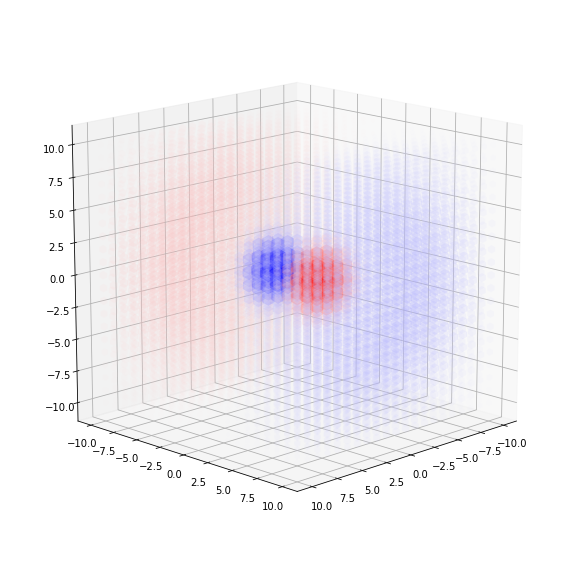

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

width = 10
resol = 21

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)
c = np.linspace(-width,width,resol)

[Xr, Yr, Zr] = np.meshgrid(a, b, c)

C = eval(HWF_nlm(3,1,1,0,0,0)).flatten()
S = np.abs(C)*10000

ax.scatter(Xr, Yr, Zr, c=C, s=S, cmap=cmap, marker='h', linewidths=0)

ax.view_init(elev=15, azim=45)
plt.show()

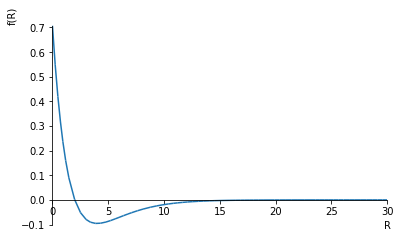

In [29]:
plot(R_nl(2,0,R), (R, 0, 30))

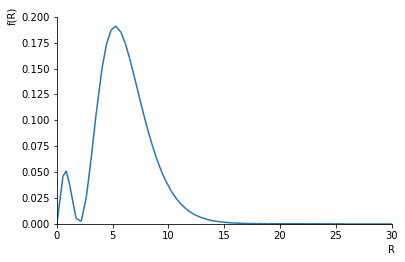

In [30]:
plot(R_nl(2,0,R)**2 * R**2, (R, 0, 30))

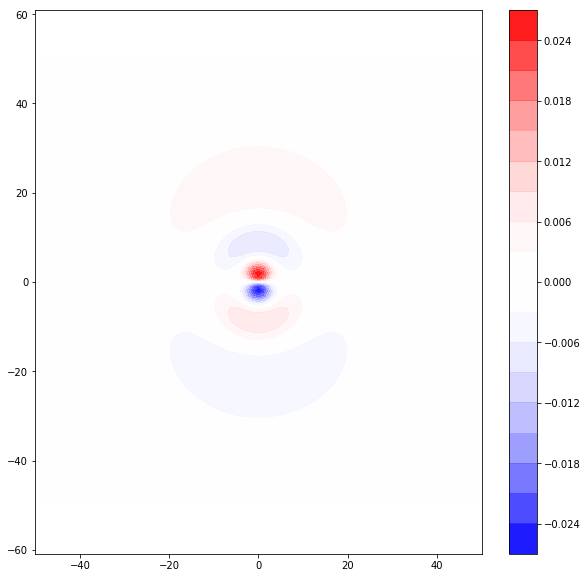

In [32]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')

width = 50
resol = 101

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)

[Xr, Yr] = np.meshgrid(a, b)
Zr = 0

C = eval(HWF_nlm(4,1,1,0,0,0))
S = np.abs(C)*10000

cmap =  colormap(.5)

plt.axis('equal')
plt.contourf(Xr, Yr, C, 20, cmap=cmap)
plt.colorbar()
plt.show()

0.33260235140636113
0.9998751071420494


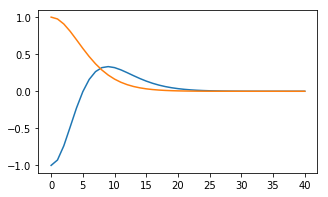

In [33]:
fig = plt.figure(figsize=(5,3))

width = 20
resol = 41

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)
c = np.linspace(-width,width,resol)

[Xr, Yr, Zr] = np.meshgrid(a, b, c)

d = np.linspace(0,40,41)
Sp = []

for i in range(len(d)):
    I = -1*eval(HWF_nlm(2,1,0,0,0,0))*eval(HWF_nlm(2,1,0,0,0,d[i]))
    Sp.append(np.sum(I))
    
plt.plot(d,Sp)
print(np.max(Sp))
    
Pp = []

for i in range(len(d)):
    I = eval(HWF_nlm(2,1,-1,0,0,0))*eval(HWF_nlm(2,1,-1,0,0,d[i]))
    Pp.append(np.sum(I))
    
plt.plot(d,Pp)
print(np.max(Pp))

plt.show()

0.154633395197
0.559600849408


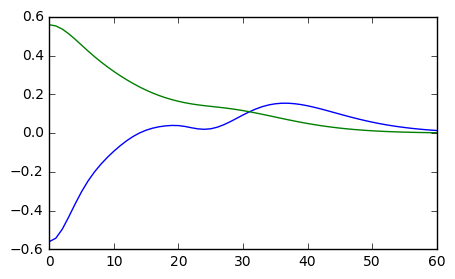

In [102]:
fig = plt.figure(figsize=(5,3))

width = 20
resol = 41

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)
c = np.linspace(-width,width,resol)

[Xr, Yr, Zr] = np.meshgrid(a, b, c)

d = np.linspace(0,60,61)
Sp = []

for i in range(len(d)):
    I = -1*eval(HWF_nlm(4,1,0,0,0,0))*eval(HWF_nlm(4,1,0,0,0,d[i]))
    Sp.append(np.sum(I))
    
plt.plot(d,Sp)
print(np.max(Sp))
    
Pp = []

for i in range(len(d)):
    I = eval(HWF_nlm(4,1,-1,0,0,0))*eval(HWF_nlm(4,1,-1,0,0,d[i]))
    Pp.append(np.sum(I))
    
plt.plot(d,Pp)
print(np.max(Pp))

plt.show()

0.50466010688
9.78036140334e-18


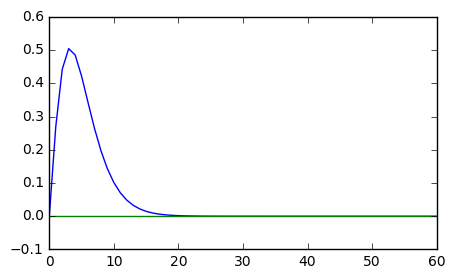

In [109]:
fig = plt.figure(figsize=(5,3))

width = 20
resol = 41

a = np.linspace(-width,width,resol)
b = np.linspace(-width,width,resol)
c = np.linspace(-width,width,resol)

[Xr, Yr, Zr] = np.meshgrid(a, b, c)

d = np.linspace(0,60,61)
spz = []

for i in range(len(d)):
    I = -1*eval(HWF_nlm(1,0,0,0,0,0))*eval(HWF_nlm(2,1,0,0,0,d[i]))
    spz.append(np.sum(I))
    
plt.plot(d,spz)
print(np.max(spz))

spy = []

for i in range(len(d)):
    I = -1*eval(HWF_nlm(1,0,0,0,0,0))*eval(HWF_nlm(2,1,-1,0,0,d[i]))
    spy.append(np.sum(I))
    
plt.plot(d,spy)
print(np.max(spy))

plt.show()